In [40]:
#import modules
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from datetime import datetime
from matplotlib.ticker import MultipleLocator

In [116]:
# Read the file, skipping header lines until "DATA"
skip_rows = 0
with open('/Users/abijones/Documents/columbia_coding/rutgers/downloaded_data/grdc_discharge/station_data/1531800_Q_Day.Cmd.txt', 'r', encoding='latin-1') as file:
    for line in file:
        if "# DATA" in line.strip():
            break
        skip_rows += 1
        
        
df = pd.read_csv('/Users/abijones/Documents/columbia_coding/rutgers/downloaded_data/grdc_discharge/station_data/1531800_Q_Day.Cmd.txt', skiprows=skip_rows + 1, delimiter=";", comment="#", encoding='latin-1')
df.columns = df.columns.str.strip()
df = df.drop("hh:mm", axis=1)
df['YYYY-MM-DD'] = pd.to_datetime(df['YYYY-MM-DD'])
df

df_chosen_period = df[(df['YYYY-MM-DD'] >= pd.to_datetime('2001-01-01')) & (df['YYYY-MM-DD'] < pd.to_datetime('2007-03-01'))]

timeseries_observed = df_chosen_period['Value']

In [117]:
#read in EF5 simulated Q data
ef5_Q = pd.read_csv('/Users/abijones/Documents/columbia_coding/rutgers/rutgers_outputs/EF5_outputs/timeseries_ghana/daily_ts.1531800.crest.csv')
ef5_Q_chosen_period = ef5_Q[(pd.to_datetime(ef5_Q['Date']) >= pd.to_datetime('2001-01-01'))& (pd.to_datetime(ef5_Q['Date']) < pd.to_datetime('2007-03-01'))]

timeseries_simulated = ef5_Q_chosen_period['Daily Avg Q (cms)']

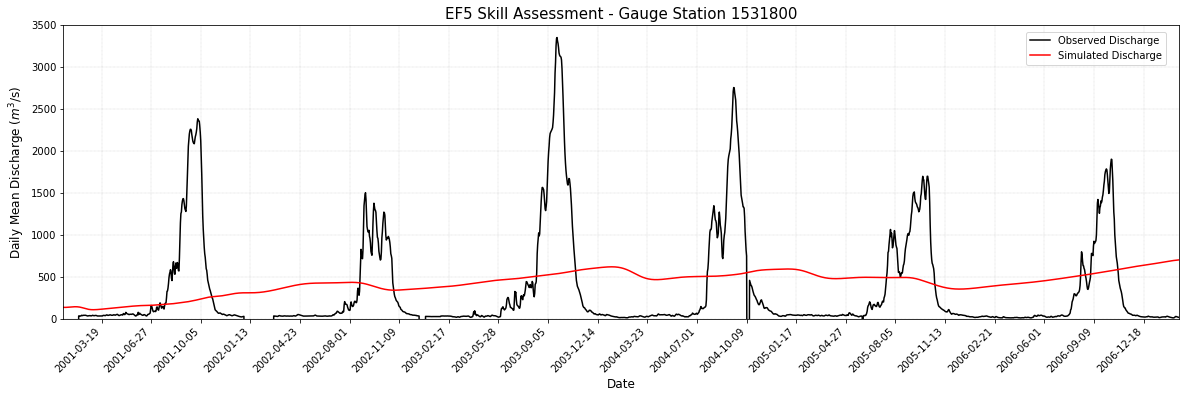

In [129]:
#plot timeseries for identified spike period 

# create data for x axis
days_observed = pd.to_datetime(df_chosen_period['YYYY-MM-DD'])
days_simulated = pd.to_datetime(ef5_Q_chosen_period['Date'])

# set up figure
fig, ax1 = plt.subplots(figsize=(20,6))

# plot 
plt.plot(days_observed, timeseries_observed, 'black', label = 'Observed Discharge') #'k-'
plt.plot(days_simulated, timeseries_simulated, 'red', label = 'Simulated Discharge') #'gray'

# format x and y axes
ax1.set_xlabel('Date', fontsize=12, rotation=0)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.tick_params(axis='x', labelrotation=45)
plt.xlim(min(days_observed),max(days_observed)) 

ax1.set_ylabel('Daily Mean Discharge (${m^3}$/s)', fontsize=12)
ax1.axes.set_ylim(0, 3500)

# add legend
fig.legend(loc='upper left', bbox_to_anchor=(0.79, 0.875))

# add title
ax1.set_title('EF5 Skill Assessment - Gauge Station 1531800', fontsize=15)

# add gridlines
ax1.grid(which='major', axis='both', linewidth=0.3, color='black', alpha=0.5, linestyle=':')

# save figure to file
plt.savefig('./hydrograph_plots/gauge_station_1531800.pdf', orientation='portrait', format='pdf', bbox_inches='tight')

fig.autofmt_xdate(rotation=45)
plt.show()